<a href="https://colab.research.google.com/github/Wayy66/Wayy66/blob/main/5650_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


# Part 1 - Import Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
sns.set()
rand_state=1000

In [29]:
df = pd.read_csv('diabetes.csv')
# Review datatype for each variables
df.info()

print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Part 2 - Data Cleaning

In [31]:
# Generate a list to convert variables into factor
variables_to_convert = [
    'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age',
    'Education', 'Income'
]

# Convert variables to categorical factors
for variable in variables_to_convert:
    df[variable] = df[variable].astype('category')

In [17]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print columns with missing values and their corresponding counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [18]:
# Replace 'Diabetes_012' with the actual column name if different
diabetes_counts = df['Diabetes_012'].value_counts()

# Print the counts of each class
print("Class Distribution for Diabetes_012:")
print(diabetes_counts)

# Calculate the proportion of each class
total_samples = diabetes_counts.sum()
class_proportions = diabetes_counts / total_samples

# Print the proportions of each class
print("\nClass Proportions for Diabetes_012:")
print(class_proportions)

Class Distribution for Diabetes_012:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Class Proportions for Diabetes_012:
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: count, dtype: float64


# Part 3 EDA

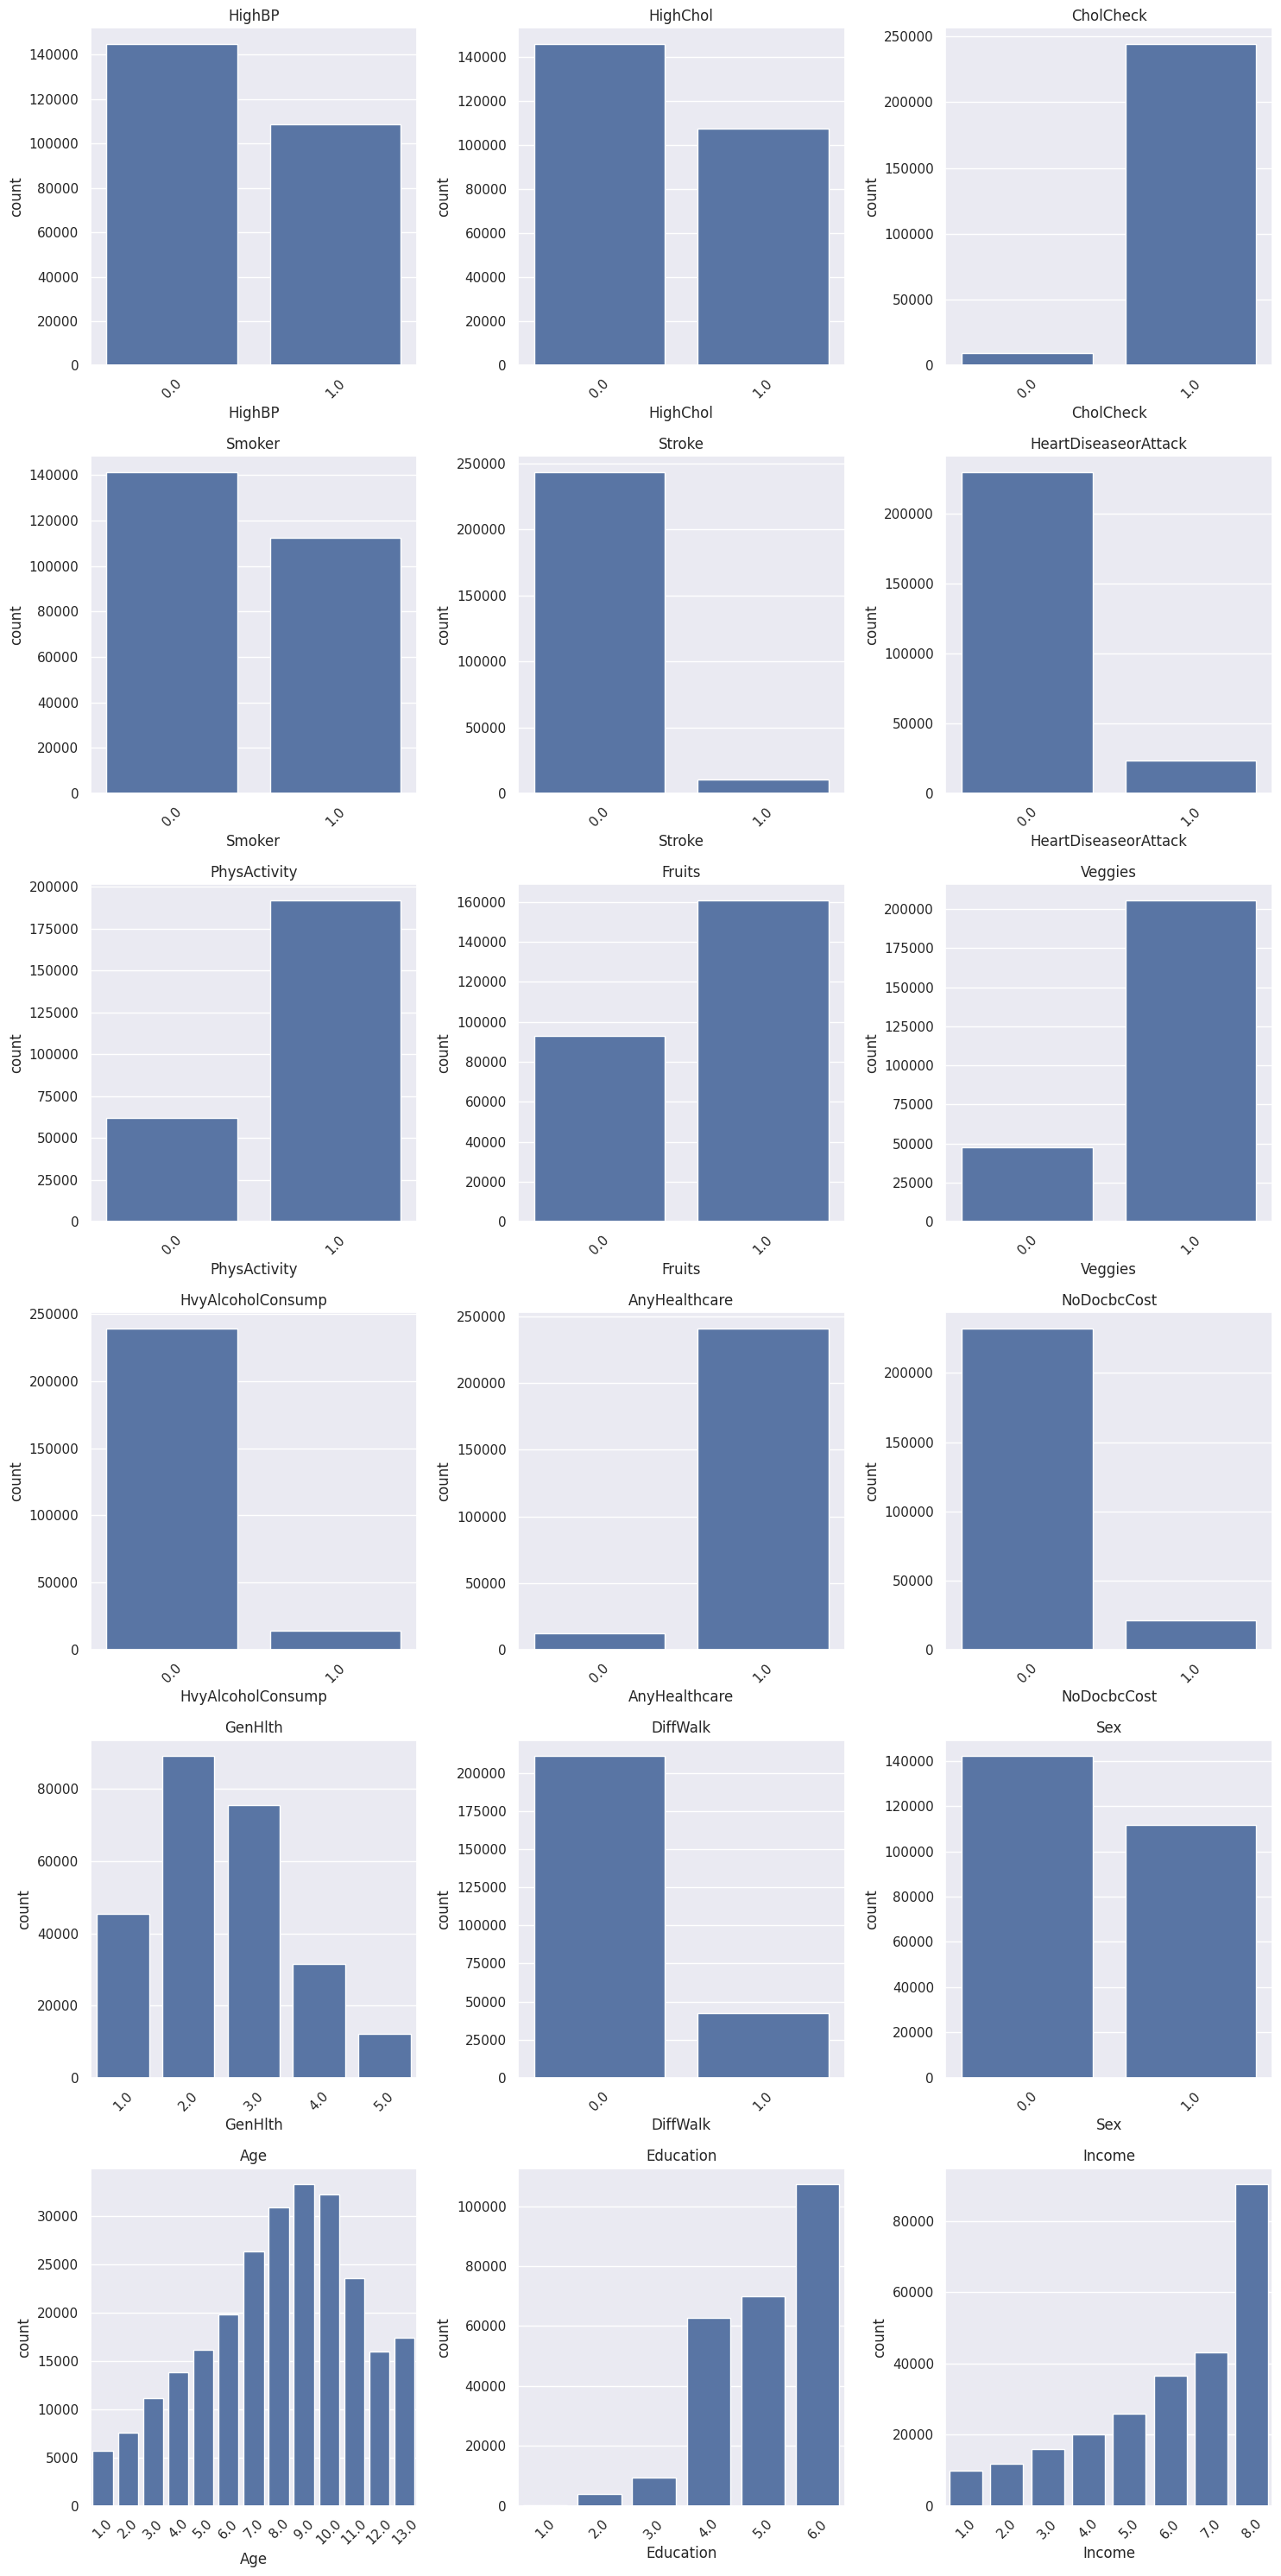

In [34]:
# List of categorical variables
categorical_variables = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age',
    'Education', 'Income']

# Determine the number of rows needed based on the number of variables and the desired number of columns
n_rows = (len(categorical_variables) + 2) // 3

# Plotting
plt.figure(figsize=(15, 5 * n_rows))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(n_rows, 3, i)
    sns.countplot(x=variable, data=df)
    plt.title(variable)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Replace values 1 and 2 in 'Diabetes_012' with 1
df['Diabetes_012'] = df['Diabetes_012'].replace({1.0: 1, 2.0: 1})

# Calculate correlation matrix
corr_matrix = df.corr()

# Extract correlations of all variables with 'Diabetes_012'
diabetes_corr = corr_matrix['Diabetes_012']

# Sort correlations in descending order
diabetes_corr_sorted = diabetes_corr.abs().sort_values(ascending=False)

# Print correlations
print(diabetes_corr_sorted)

Diabetes_012            1.000000
GenHlth                 0.300785
HighBP                  0.270334
BMI                     0.223851
DiffWalk                0.222155
HighChol                0.210290
Age                     0.185891
HeartDiseaseorAttack    0.176933
PhysHlth                0.174948
Income                  0.172794
Education               0.131803
PhysActivity            0.121392
Stroke                  0.104800
MentHlth                0.074971
CholCheck               0.067879
Smoker                  0.062778
Veggies                 0.059219
HvyAlcoholConsump       0.056682
Fruits                  0.042088
NoDocbcCost             0.038025
Sex                     0.029606
AnyHealthcare           0.014079
Name: Diabetes_012, dtype: float64




```
+-------------------------+--------------------+
|         Feature         |   Correlation (%) |
+-------------------------+--------------------+
|         GenHlth         |       30.08        |
|          HighBP         |       27.03        |
|            BMI          |       22.39        |
|         DiffWalk        |       22.22        |
|         HighChol        |       21.03        |
|            Age          |       18.59        |
| HeartDiseaseorAttack    |       17.69        |
|         PhysHlth        |       17.50        |
|          Income         |       17.28        |
|        Education        |       13.18        |
|      PhysActivity       |       12.14        |
|          Stroke         |       10.48        |
|         MentHlth        |        7.50        |
|        CholCheck        |        6.79        |
|          Smoker         |        6.28        |
|         Veggies         |        5.92        |
|   HvyAlcoholConsump     |        5.67        |
|          Fruits         |        4.21        |
|       NoDocbcCost       |        3.80        |
|           Sex           |        2.96        |
|       AnyHealthcare     |        1.41        |
+-------------------------+--------------------+
```



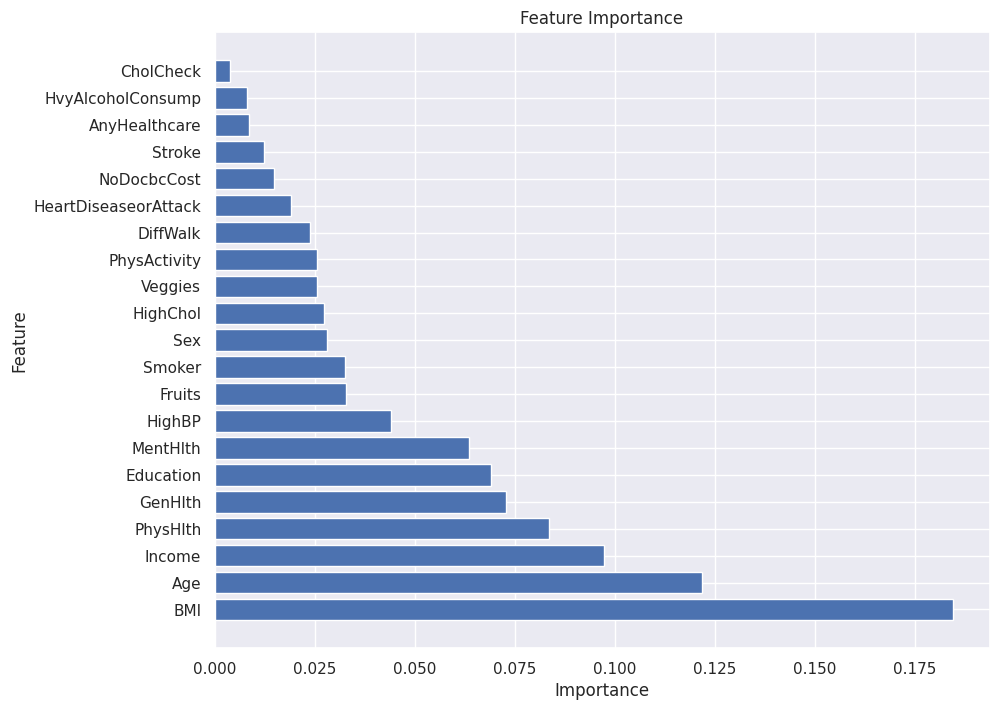

In [24]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your feature and target variables for training
# Replace RandomForestClassifier with RandomForestRegressor for regression tasks
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [20]:
# Remove specified columns
columns_to_remove = ['NoDocbcCost', 'AnyHealthcare', 'HvyAlcoholConsump', 'CholCheck']
df = df.drop(columns=columns_to_remove)

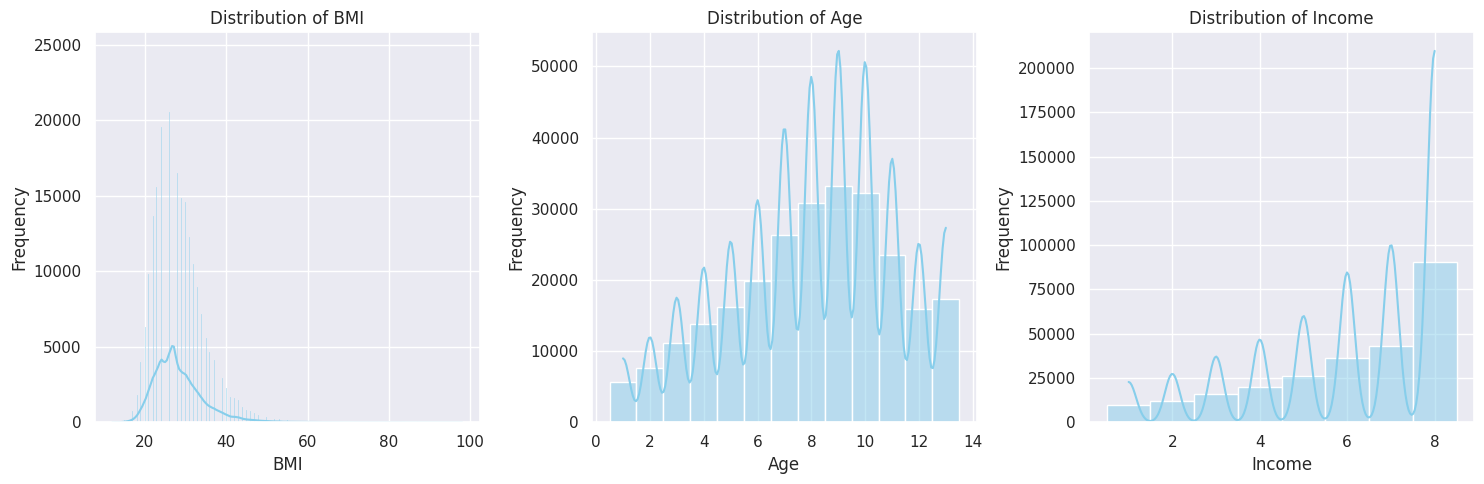

In [26]:
# Select numerical variables for distribution analysis
numerical_vars = ['BMI', 'Age', 'Income']

# Plot histograms for selected numerical variables
plt.figure(figsize=(15, 5))

for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[var], kde=True, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

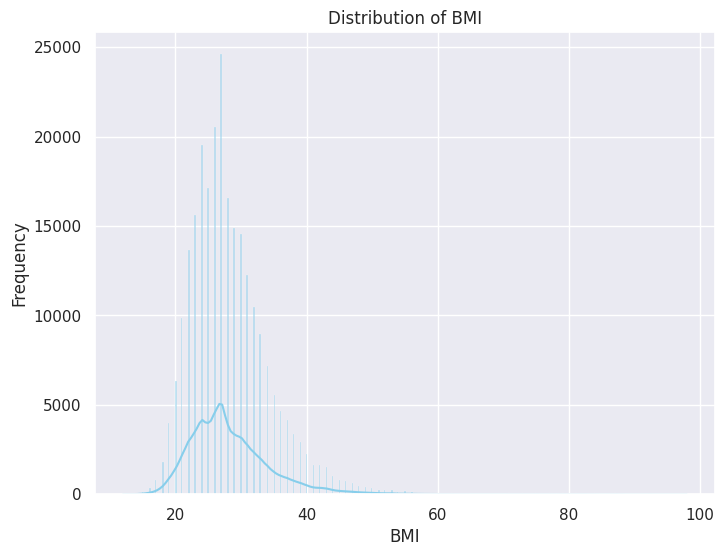

In [27]:
# Plot histogram for BMI distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], kde=True, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

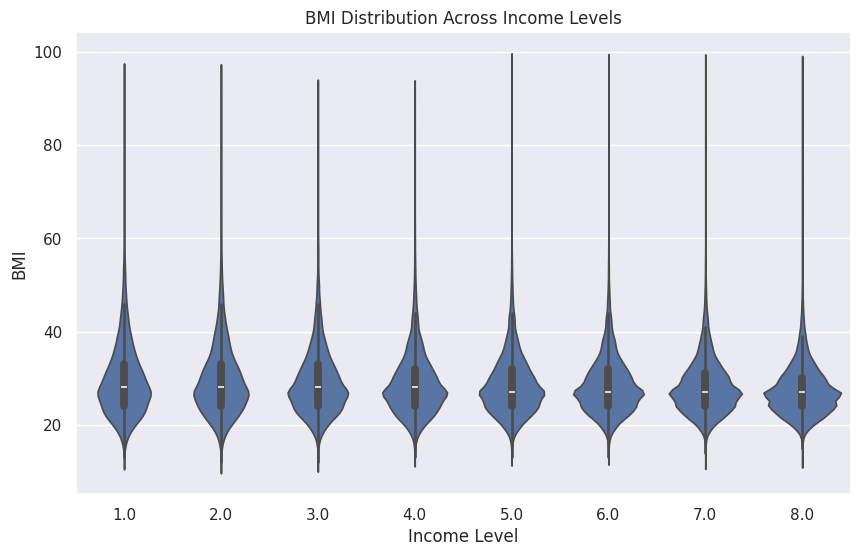

In [28]:
# Define the order of income levels for plotting
income_order = sorted(df['Income'].unique())

# Create a violin plot for BMI vs. Income
plt.figure(figsize=(10, 6))
sns.violinplot(x='Income', y='BMI', data=df, order=income_order)
plt.title('BMI Distribution Across Income Levels')
plt.xlabel('Income Level')
plt.ylabel('BMI')
plt.xticks(ticks=range(len(income_order)), labels=income_order)
plt.show()

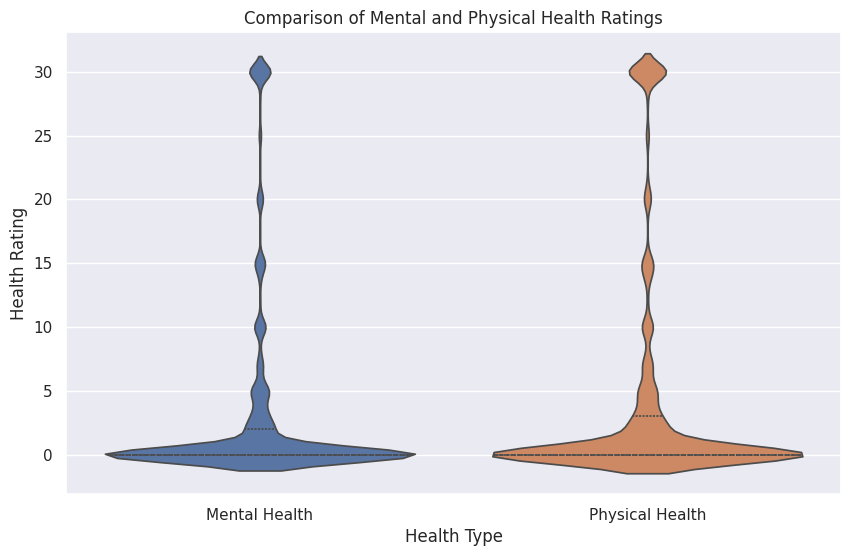

In [29]:
# Create a violin plot for Mental Health vs. Physical Health
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['MentHlth', 'PhysHlth']], inner='quartile')
plt.title('Comparison of Mental and Physical Health Ratings')
plt.xlabel('Health Type')
plt.ylabel('Health Rating')
plt.xticks(ticks=[0, 1], labels=['Mental Health', 'Physical Health'])
plt.show()

# Part 4 - Split Training and Testing dataset




In [21]:
from sklearn.model_selection import train_test_split

# Define X with features and y with target variable
X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']                # Target variable

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# Part 5 - Generating RF model

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Instantiate RandomForestClassifier with class_weight='balanced'
rf_classifier = RandomForestClassifier(class_weight='balanced')

# Perform cross-validation and get accuracy scores
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Fit the classifier on the entire training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_hat = rf_classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_hat)

print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("\nCross-Validation Mean Accuracy:", cv_scores.mean())

Confusion Matrix:
[[61499  2495]
 [ 9840  2270]]

Accuracy: 0.837919163250289

Cross-Validation Mean Accuracy: 0.8403782083641541




```
# Evaluation Table
+---------------------+-------------------------+-------------------------+
|                     |    Predicted Negative   |    Predicted Positive   |
+---------------------+-------------------------+-------------------------+
|  Actual Negative    |          61499          |           2495          |
+---------------------+-------------------------+-------------------------+
|  Actual Positive    |          9840           |           2270          |
+---------------------+-------------------------+-------------------------+
```

# Part 6 - Lowering treshold of the RF model

In [26]:
# Instantiate RandomForestClassifier with class_weight='balanced'
rf_classifier = RandomForestClassifier(class_weight='balanced')

# Perform cross-validation and get accuracy scores
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Fit the classifier on the entire training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_hat_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of class 1
threshold = 0.2
y_hat = (y_hat_prob >= threshold).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_hat)

print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("\nCross-Validation Mean Accuracy:", cv_scores.mean())

Confusion Matrix:
[[47698 16296]
 [ 3885  8225]]

Accuracy: 0.7348233995584988

Cross-Validation Mean Accuracy: 0.8402655778360266




```
# Evaluation Table
+---------------------+-------------------------+-------------------------+
|                     |    Predicted Negative   |    Predicted Positive   |
+---------------------+-------------------------+-------------------------+
|  Actual Negative    |          47698          |           16296         |
+---------------------+-------------------------+-------------------------+
|  Actual Positive    |          3885           |           8225          |
+---------------------+-------------------------+-------------------------+
```

# Part 7 - Adaboosting

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Apply oversampling to balance classes
oversampler = RandomOverSampler(random_state=1000)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Instantiate AdaBoostClassifier
ada_classifier = AdaBoostClassifier()

# Fit the classifier to the resampled training data
ada_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = ada_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.7297382529170608
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82     63994
         1.0       0.34      0.76      0.47     12110

    accuracy                           0.73     76104
   macro avg       0.64      0.74      0.65     76104
weighted avg       0.85      0.73      0.76     76104



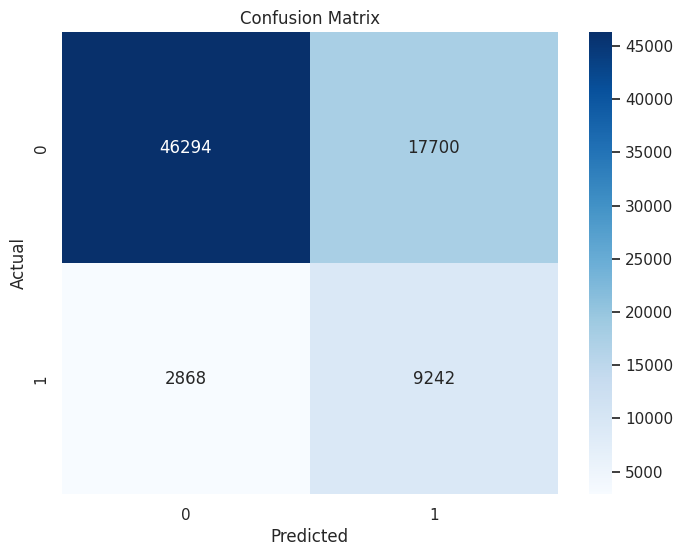

In [52]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Part 8 - XGBoost

Accuracy: 0.7251918427415116
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81     63994
         1.0       0.34      0.77      0.47     12110

    accuracy                           0.73     76104
   macro avg       0.64      0.74      0.64     76104
weighted avg       0.85      0.73      0.76     76104



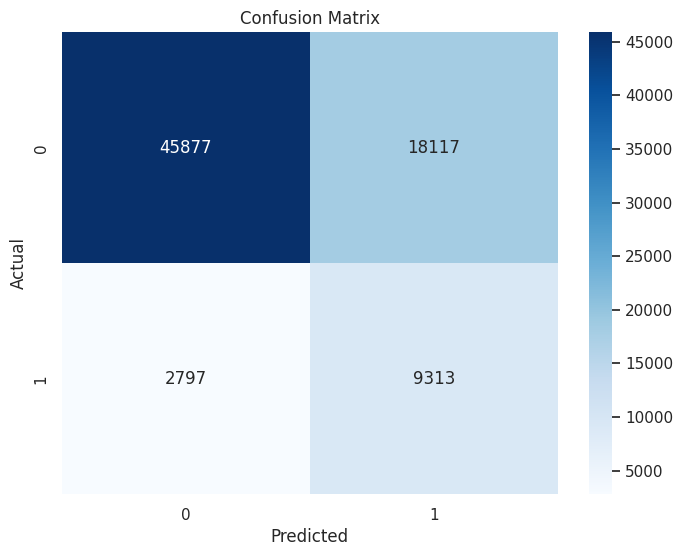

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define X with features and y with target variable
X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']                # Target variable

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=1000)

# Calculate the ratio of negative class instances to positive class instances
neg_pos_ratio = (y_train == 0).sum() / (y_train == 1).sum()

# Instantiate XGBoost classifier with balanced scale_pos_weight
xgb_classifier = XGBClassifier(scale_pos_weight=neg_pos_ratio)

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Part 9 - SVM

Accuracy: 0.843070009460738
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     63994
         1.0       0.64      0.03      0.06     12110

    accuracy                           0.84     76104
   macro avg       0.74      0.51      0.49     76104
weighted avg       0.81      0.84      0.78     76104



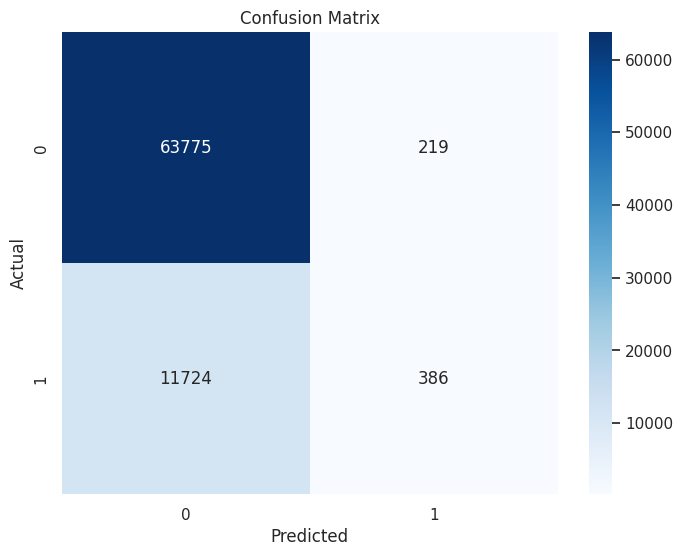

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define X with features and y with target variable
X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']                # Target variable

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# Instantiate SVM classifier
svm_classifier = SVC()

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Part 10 - XGBoost with RandomOverSampler and tuning

In [27]:
# Generate a list to convert variables into factor
variables_to_convert_2 = [
    'HighBP', 'HighChol', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'
]

# Perform one-hot encoding, including the target variable 'Diabetes_012'
encoded_df = pd.get_dummies(df, columns=variables_to_convert_2)

# Display the first few rows of the encoded dataframe
print(encoded_df.head())

  Diabetes_012   BMI  MentHlth  PhysHlth  HighBP_0.0  HighBP_1.0  \
0          0.0  40.0      18.0      15.0       False        True   
1          0.0  25.0       0.0       0.0        True       False   
2          0.0  28.0      30.0      30.0       False        True   
3          0.0  27.0       0.0       0.0       False        True   
4          0.0  24.0       3.0       0.0       False        True   

   HighChol_0.0  HighChol_1.0  Smoker_0.0  Smoker_1.0  ...  Education_5.0  \
0         False          True       False        True  ...          False   
1          True         False       False        True  ...          False   
2         False          True        True       False  ...          False   
3          True         False        True       False  ...          False   
4         False          True        True       False  ...           True   

   Education_6.0  Income_1.0  Income_2.0  Income_3.0  Income_4.0  Income_5.0  \
0          False       False       False        

Accuracy: 0.724902764637864
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     63994
         1.0       0.34      0.78      0.47     12110

    accuracy                           0.72     76104
   macro avg       0.64      0.75      0.64     76104
weighted avg       0.85      0.72      0.76     76104



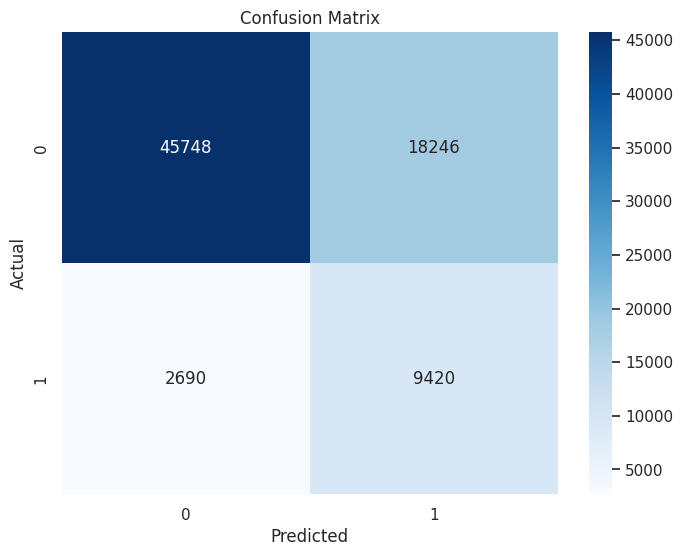

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Separate features and target variable
X = encoded_df.drop('Diabetes_012', axis=1)
y = encoded_df['Diabetes_012']

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# Apply RandomOverSampler to balance classes in the training set
oversampler = RandomOverSampler(random_state=1000)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Define the parameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Instantiate XGBoost classifier
xgb_classifier = XGBClassifier(random_state=1000)

# Perform grid search to find the best parameters
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_

# Instantiate XGBoost classifier with the best parameters
xgb_classifier_tuned = XGBClassifier(random_state=1000, **best_params)

# Fit the classifier to the resampled training data
xgb_classifier_tuned.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb_classifier_tuned.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()